In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json



In [3]:
url = "https://services.arcgis.com/KTcxiTD9dsQw4r7Z/arcgis/rest/services/TxDOT_AADT_Annuals/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json"
r = requests.get(url)
txdot_data = r.json()

In [4]:
clean_txdot_data = txdot_data["features"]

In [5]:
count = 0
city = []
county = []
AADT_2013 = []
AADT_2014 = []
AADT_2015 = []
AADT_2016 = []
AADT_2017 = []
AADT_2018 = []

In [6]:
for e in clean_txdot_data:
    city.append(clean_txdot_data[count]["attributes"]["DIST_NM"])
    county.append(clean_txdot_data[count]["attributes"]["CNTY_NM"]) 
    AADT_2013.append(clean_txdot_data[count]["attributes"]["AADT_2013"]) 
    AADT_2014.append(clean_txdot_data[count]["attributes"]["AADT_2014"]) 
    AADT_2015.append(clean_txdot_data[count]["attributes"]["AADT_2015"]) 
    AADT_2016.append(clean_txdot_data[count]["attributes"]["AADT_2016"]) 
    AADT_2017.append(clean_txdot_data[count]["attributes"]["AADT_2017"]) 
    AADT_2018.append(clean_txdot_data[count]["attributes"]["AADT_2018"]) 
    count += 1 


In [7]:
tx_dot_df = pd.DataFrame({"City": city,
                         "County": county,
                         "AADT_2013": AADT_2013,
                         "AADT_2014": AADT_2014,
                         "AADT_2015": AADT_2015,
                         "AADT_2016": AADT_2016,
                         "AADT_2017": AADT_2017,
                         "AADT_2018": AADT_2018})

In [8]:
tx_dot_df

,City,County,AADT_2013,AADT_2014,AADT_2015,AADT_2016,AADT_2017,AADT_2018
0,El Paso,El Paso,0,0,0,0,1473,234
1,El Paso,El Paso,980,1073,1153,515,399,1097
2,El Paso,El Paso,0,0,0,0,1450,1603
3,El Paso,El Paso,0,0,0,0,1092,2365
4,El Paso,El Paso,393,362,455,439,630,803
...,...,...,...,...,...,...,...,...
31467,Atlanta,Bowie,2570,2058,2859,2172,2879,2184
31468,Atlanta,Bowie,176,133,141,155,155,154
31469,Atlanta,Bowie,171,142,131,147,162,120
31470,Atlanta,Bowie,205,115,147,147,147,101


In [9]:
greater_austin_df = tx_dot_df.loc[tx_dot_df["City"] == "Austin"].groupby("County").sum().reset_index()
greater_austin_df

,County,AADT_2013,AADT_2014,AADT_2015,AADT_2016,AADT_2017,AADT_2018
0,Bastrop,1253562,1261303,1359191,1402443,1383032,1523780
1,Blanco,230964,222117,294814,251890,256315,275459
2,Burnet,593386,562338,622879,653060,631378,730347
3,Caldwell,554353,493104,528521,558772,674054,711293
4,Gillespie,303319,289665,377365,327191,359710,346208
5,Hays,2322812,2354095,2565262,2707284,2659963,2834725
6,Lee,351117,359399,374507,336099,349228,375877
7,Llano,261786,243522,297515,291416,275050,293366
8,Mason,74485,74853,84874,77223,72075,79011
9,Travis,13276981,12900946,14420060,14950796,15266997,16388126


In [10]:
austin_df = greater_austin_df.loc[greater_austin_df["County"].isin(["Hays","Travis","Williamson"])].set_index("County")
austin_df.loc['Total']= austin_df.sum(numeric_only=True, axis=0)


In [11]:
austin_df

,AADT_2013,AADT_2014,AADT_2015,AADT_2016,AADT_2017,AADT_2018
County,,,,,,
Hays,2322812,2354095,2565262,2707284,2659963,2834725
Travis,13276981,12900946,14420060,14950796,15266997,16388126
Williamson,4919928,5074504,5074217,5466111,6230758,6809710
Total,20519721,20329545,22059539,23124191,24157718,26032561


Text(0, 0.5, 'Traffic Trips')

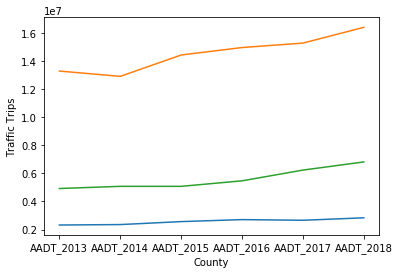

In [18]:
plt.plot(austin_df.columns, austin_df.loc["Hays"])
plt.plot(austin_df.columns, austin_df.loc["Travis"])
plt.plot(austin_df.columns, austin_df.loc["Williamson"])



plt.xlabel("County")
plt.ylabel("Traffic Trips")



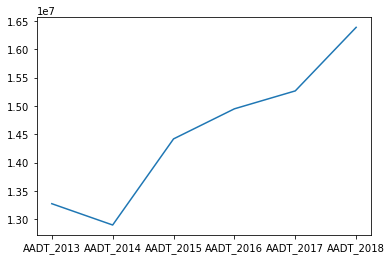

In [13]:
plt.plot(austin_df.columns, austin_df.loc["Travis"])


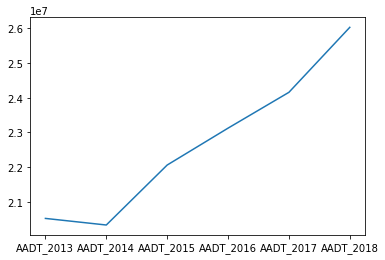

In [14]:
plt.plot(austin_df.columns, austin_df.loc["Total"])